**DESCRIPTION

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
 

Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

Variables	Description
Pregnancies	Number of times pregnant
Glucose	Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	Diastolic blood pressure (mm Hg)
SkinThickness	Triceps skinfold thickness (mm)
Insulin	Two hour serum insulin
BMI	Body Mass Index
DiabetesPedigreeFunction	Diabetes pedigree function
Age	Age in years
Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0
Project Task: Week 1

Data Exploration:

Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

Visually explore these variables using histograms. Treat the missing values accordingly.

There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

 

Data Exploration:

Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

Perform correlation analysis. Visually explore it using a heat map.

 

Project Task: Week 2

Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

Apply an appropriate classification algorithm to build a model.

Compare various models with the results from KNN algorithm.

Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

Please be descriptive to explain what values of these parameter you have used.

 

Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

Pie chart to describe the diabetic or non-diabetic population

Scatter charts between relevant variables to analyze the relationships

Histogram or frequency charts to analyze the distribution of the data

Heatmap of correlation analysis among the relevant variables

Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.**

In [1]:
import numpy as np
import pandas as pd
import math as mt
import scipy
import sklearn
import os

import scipy.stats as stats

import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.impute import MissingIndicator
#from sklearn.experimental import enable_iterative_imputer  # noqa

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import GridSearchCV, GroupKFold, StratifiedKFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import pca

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics, model_selection

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, average_precision_score

%matplotlib inline
sns.set_theme(style="darkgrid")

/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
os.listdir()

['healthcare.ipynb',
 '.DS_Store',
 'wikipedia_toxicity.docx',
 'healthcare_project.html',
 'Healthcare - Diabetes',
 'Case Study - healthcare Industry.docx',
 'Wikipedia Toxicity.html',
 'user_recommend.docx',
 'healthcare_project.ipynb',
 'healthcare appointment data.csv',
 'Healthcare PGP.docx',
 'train.csv',
 '.ipynb_checkpoints',
 'corr_knn.xlsx',
 'healthcare_reporting.pdf']

In [3]:
healthcare = pd.read_csv("/Users/niru/Desktop/healthcre_Project /Healthcare - Diabetes/health_care_diabetes.csv")
healthcare.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#Pregnancies: Number of times pregnant
#Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#BloodPressure: Diastolic blood pressure (mm Hg)
#SkinThickness: Triceps skin fold thickness (mm)
#Insulin: 2-Hour serum insulin (mu U/ml)
#BMI: Body mass index (weight in kg/(height in m)^2)
#DiabetesPedigreeFunction: Diabetes pedigree function
#Age: Age (years)

#Target variable is outcome column.

In [4]:
healthcare.shape

(768, 9)

In [5]:
#pd.set_option('display.max_rows',768)
#healthcare

In [6]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
list(healthcare)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
for col in healthcare.columns:
    print(col, len(healthcare[col].unique()))

Pregnancies 17
Glucose 136
BloodPressure 47
SkinThickness 51
Insulin 186
BMI 248
DiabetesPedigreeFunction 517
Age 52
Outcome 2


Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, 
   a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the 
   data types and the count of variables.

## Problem. 1

# Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

# • Glucose

# • BloodPressure

# • SkinThickness

# • Insulin

# • BMI

In [9]:
healthcare.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
healthcare.describe(include=['int64'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,81.000000,1.000000


In [11]:
healthcare.describe(include=['float64'])

,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000
mean,31.992578,0.471876
std,7.884160,0.331329
min,0.000000,0.078000
25%,27.300000,0.243750
50%,32.000000,0.372500
75%,36.600000,0.626250
max,67.100000,2.420000


# Understand the variables and their corresponding values

#pregnancie is discrete variable and can also be act as a categoriacl variables
#outcome is categorical variable.
#Glucose, BloodPressure, SkinThickness, Insuline are discrete variableand can also be act as contineous variables
#BMI, DiabetesPedigreeFunction are contineous variables

In [12]:
healthcare.isna().sum() # no of NAs is zero

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
healthcare.isnull().sum() # no of NULL values is zero

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# for Contineous variables( float64)

# BMI  
On the columns below, a value of zero does not make sense and thus indicates missing value:¶

In [14]:
np.sort(healthcare.BMI.unique())

array([ 0. , 18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20. , 20.1,
       20.4, 20.8, 21. , 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5,
       23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6,
       24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8,
       25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9,
       27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28. ,
       28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.2,
       29.3, 29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4,
       30.5, 30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.6, 31.9, 32. ,
       32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.1, 33.2,
       33.3, 33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1, 34.2, 34.3, 34.4,
       34.5, 34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2, 35.3, 35.4, 35.5,
       35.6, 35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36

#BMI min = 0 this shows that that its a missing value while
#BMI max = 67, this may happen if someone with 166 cm height and 185 kg weight.

In [15]:
bmi = healthcare.BMI.value_counts().to_frame().sort_index()

bmi.rename(columns = {'BMI': 'bmi_count'}, inplace =True)
bmi.index.name = 'bmi'

bmi.head()

,bmi_count
bmi,
0.0,11
18.2,3
18.4,1
19.1,1
19.3,1


In [16]:
(healthcare['BMI'].value_counts(normalize = True)*100).head() # % of values.

32.0    1.692708
31.2    1.562500
31.6    1.562500
0.0     1.432292
33.3    1.302083
Name: BMI, dtype: float64

In [17]:
bmi[bmi.index == 0.0]
# there are 11 missing values i.e, 1.4323 %
# hence, we can remove the missing values or impute but is better to remove.

,bmi_count
bmi,
0.0,11


In [18]:
(healthcare['BMI'].value_counts(normalize = True)*100).tail()

19.3    0.130208
49.3    0.130208
19.4    0.130208
20.0    0.130208
40.1    0.130208
Name: BMI, dtype: float64

# DiabetesPedigreeFunction

In [19]:
np.sort(healthcare.DiabetesPedigreeFunction.unique())

array([0.078, 0.084, 0.085, 0.088, 0.089, 0.092, 0.096, 0.1  , 0.101,
       0.102, 0.107, 0.108, 0.115, 0.118, 0.121, 0.122, 0.123, 0.126,
       0.127, 0.128, 0.129, 0.13 , 0.133, 0.134, 0.135, 0.136, 0.137,
       0.138, 0.14 , 0.141, 0.142, 0.143, 0.144, 0.145, 0.147, 0.148,
       0.149, 0.15 , 0.151, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158,
       0.159, 0.16 , 0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167,
       0.17 , 0.171, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179,
       0.18 , 0.181, 0.182, 0.183, 0.186, 0.187, 0.188, 0.189, 0.19 ,
       0.191, 0.192, 0.194, 0.196, 0.197, 0.198, 0.199, 0.2  , 0.201,
       0.203, 0.204, 0.205, 0.206, 0.207, 0.209, 0.21 , 0.212, 0.215,
       0.217, 0.218, 0.219, 0.22 , 0.221, 0.222, 0.223, 0.225, 0.226,
       0.227, 0.229, 0.23 , 0.231, 0.232, 0.233, 0.234, 0.235, 0.236,
       0.237, 0.238, 0.239, 0.24 , 0.241, 0.243, 0.244, 0.245, 0.246,
       0.247, 0.248, 0.249, 0.251, 0.252, 0.253, 0.254, 0.255, 0.256,
       0.257, 0.258,

DiabetesPedigreeFunction has no missing values and and seems good data by its range and distribution of the data

# for Discreate Variables(int64)

# Pregnancies

In [20]:
np.sort(healthcare.Pregnancies.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17])

Here 0 means she has not been pregnant and has no missing value

and data seems within the valid range

# Glucose

In [21]:
np.sort(healthcare.Glucose.unique())

array([  0,  44,  56,  57,  61,  62,  65,  67,  68,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193,
       194, 195, 196, 197, 198, 199])

Glucose data are numeric discreate values
with missing value = 0 and its range seems within the range

its upper range is 199 seems describable value

In [22]:
(healthcare.Glucose.value_counts(normalize = True).to_frame().sort_index()*100).head()

,Glucose
0,0.651042
44,0.130208
56,0.130208
57,0.260417
61,0.130208


In [23]:
healthcare.Glucose.value_counts().to_frame().sort_index().head()

,Glucose
0,5
44,1
56,1
57,2
61,1


0.651%(5) missing value 

we can remove the missing values or impute but is better to remove.

In [24]:
healthcare.Glucose.value_counts().to_frame().sort_index().tail()

,Glucose
195,2
196,3
197,4
198,1
199,1


# BloodPressure

In [25]:
np.sort(healthcare.BloodPressure.unique())

array([  0,  24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,
        58,  60,  61,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,
        78,  80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98,
       100, 102, 104, 106, 108, 110, 114, 122])

#here 0 means missing value and its range is 24 to 122 that seems good but here below 55 is very critical BP of petients

In [26]:
healthcare.BloodPressure.value_counts().to_frame().sort_index().head()

,BloodPressure
0,35
24,1
30,2
38,1
40,1


In [27]:
healthcare.BloodPressure.value_counts(normalize = True).to_frame().sort_index().head()

,BloodPressure
0,0.045573
24,0.001302
30,0.002604
38,0.001302
40,0.001302


missing values = 35 (4.557%)

{
Normal
Systolic <120mmHg,
Diastolic <80mmHg
Prehypertension
Systolic >=120mmHg — <=139mmHg
Diastolic >=80 — <=89mmHg
High
Systolic: >=140mmHg
Diastolic: >=90mmHg
}

In [28]:
healthcare.BloodPressure.value_counts().to_frame().sort_index().tail()

,BloodPressure
106,3
108,2
110,3
114,1
122,1


# SkinThickness

In [29]:
np.sort(healthcare.SkinThickness.unique())

array([ 0,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99])

here 0 is missing value while its range is 7mm to 99mm.

In [30]:
healthcare.SkinThickness.value_counts(normalize = True).to_frame().sort_index().head()

,SkinThickness
0,0.295573
7,0.002604
8,0.002604
10,0.006510
11,0.007812


missing value = 227 (29.557%)

In [31]:
healthcare.SkinThickness.value_counts().to_frame().sort_index().tail()

,SkinThickness
54,2
56,1
60,1
63,1
99,1


# Insulin 

In [32]:
np.sort(healthcare.Insulin.unique())

array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
        99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122,
       125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146,
       148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170,
       171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192,
       193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230,
       231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272,
       274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318,
       321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402,
       415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 54

In [33]:
healthcare.groupby('Insulin')['Outcome'].value_counts().head(10)

Insulin  Outcome
0        0          236
         1          138
14       1            1
15       0            1
16       0            1
18       0            2
22       0            1
23       0            2
25       0            1
29       1            1
Name: Outcome, dtype: int64

here 236 non-diabetic people has no insulin in his body i.e, seems to be missing value while
138 diabetic people has no insulin in his body
those are of type-1 diabetic, no production of insulin but to live they have to take insule from external source so it should not be zero.
those are of type-2 diabetic, should have insulin in his body.
hence net missing value = 236 + 138 = 374

In [34]:
healthcare.Insulin.value_counts(normalize = True).head()

0      0.486979
105    0.014323
140    0.011719
130    0.011719
120    0.010417
Name: Insulin, dtype: float64

# 48.698 % missing value

In [35]:
healthcare.groupby(['Insulin','Pregnancies'])['Outcome'].value_counts().head(10)

Insulin  Pregnancies  Outcome
0        0            0          35
                      1          19
         1            0          32
                      1           9
         2            0          32
                      1           7
         3            0          22
                      1           8
         4            0          24
                      1          17
Name: Outcome, dtype: int64

In [36]:
healthcare.groupby(['Insulin','Pregnancies'])['Outcome'].value_counts().tail(10)

Insulin  Pregnancies  Outcome
495      8            1          2
510      0            1          1
540      2            1          1
543      2            1          1
545      5            0          1
579      1            1          1
600      8            1          1
680      0            0          1
744      4            0          1
846      1            1          1
Name: Outcome, dtype: int64

# Age

In [37]:
np.sort(healthcare.Age.unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81])

no missing value

# Outcome

In [38]:
np.sort(healthcare.Outcome.unique())

array([0, 1])

no missing value

# Visually explore these variables using histograms.
# Treat the missing values accordingly.

In [39]:
for col in healthcare.columns:
    print(col, len(healthcare[col].unique()), healthcare[col].unique())

Pregnancies 17 [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose 136 [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure 47 [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness 51 [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 4

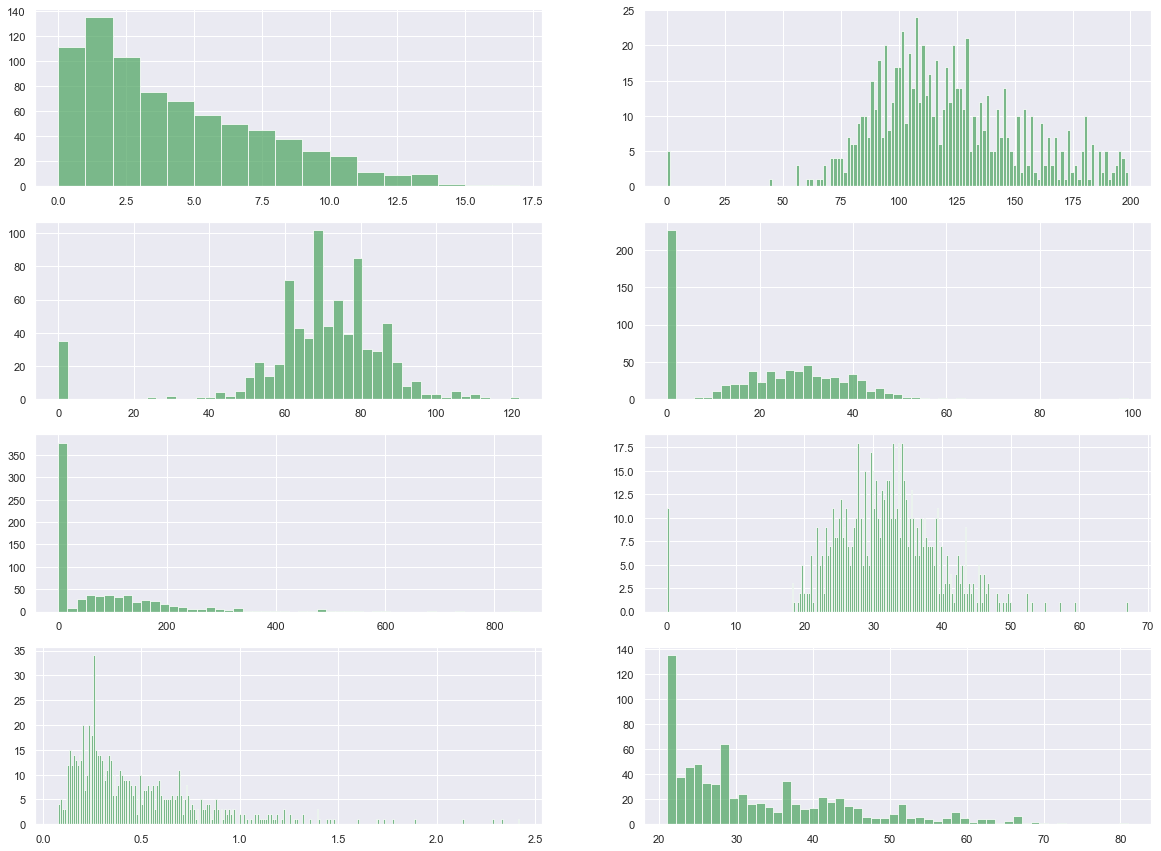

In [40]:
f, ax = plt.subplots(4,2,figsize = (20,15))
ax[0,0].hist(healthcare['Pregnancies'], 17, facecolor='g', alpha=0.75)
ax[0,1].hist(healthcare['Glucose'], 136, facecolor='g', alpha=0.75)
ax[1,0].hist(healthcare['BloodPressure'], 47, facecolor='g', alpha=0.75)
ax[1,1].hist(healthcare['SkinThickness'], 51, facecolor='g', alpha=0.75)
ax[2,0].hist(healthcare['Insulin'], 50, facecolor='g', alpha=0.75)
ax[2,1].hist(healthcare['BMI'], 248, facecolor='g', alpha=0.75)
ax[3,0].hist(healthcare['DiabetesPedigreeFunction'], 250, facecolor='g', alpha=0.75)
ax[3,1].hist(healthcare['Age'], 52, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

In [41]:
# data with outcome 1 and 0.
positive_patient = healthcare[healthcare['Outcome'] == 1]
non_positive_patient = healthcare[healthcare['Outcome'] == 0]

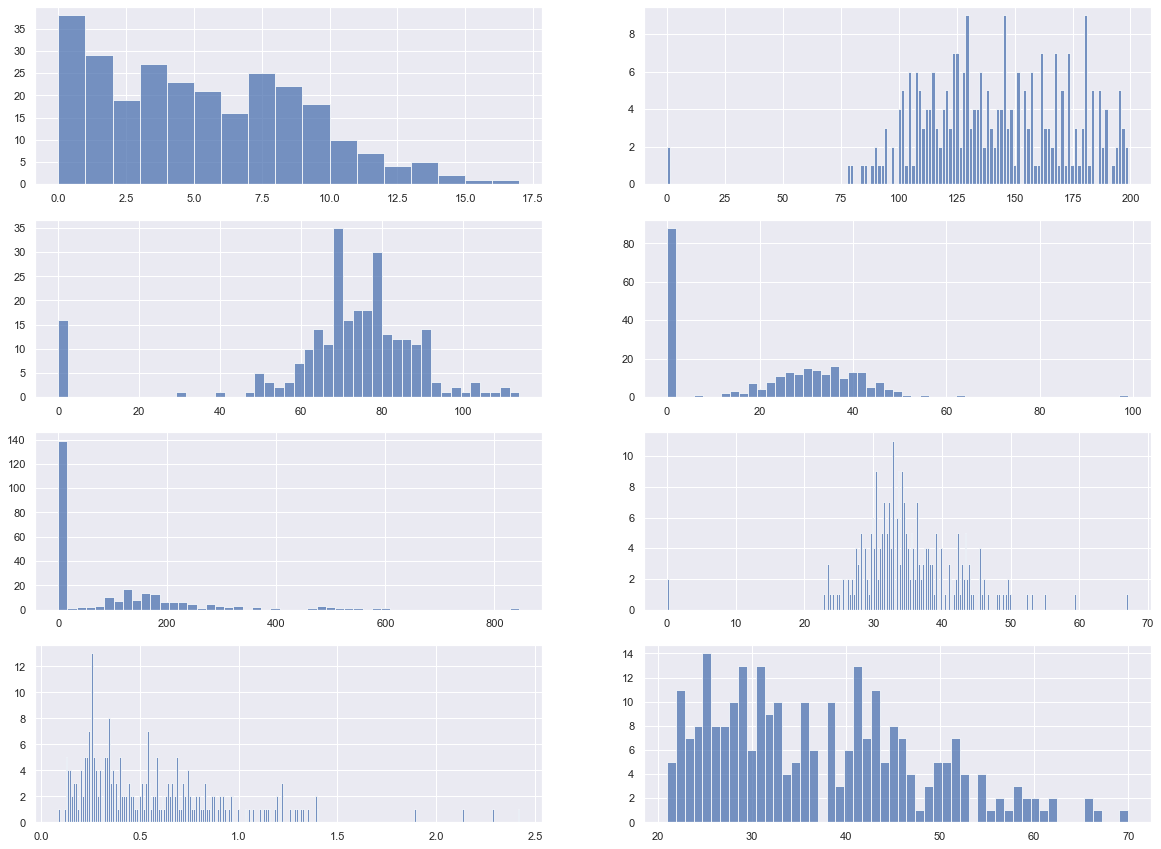

In [42]:
f, ax = plt.subplots(4,2,figsize = (20,15))
ax[0,0].hist(positive_patient['Pregnancies'], 17, facecolor='b', alpha=0.75)
ax[0,1].hist(positive_patient['Glucose'], 136, facecolor='b', alpha=0.75)
ax[1,0].hist(positive_patient['BloodPressure'], 47, facecolor='b', alpha=0.75)
ax[1,1].hist(positive_patient['SkinThickness'], 51, facecolor='b', alpha=0.75)
ax[2,0].hist(positive_patient['Insulin'], 50, facecolor='b', alpha=0.75)
ax[2,1].hist(positive_patient['BMI'], 248, facecolor='b', alpha=0.75)
ax[3,0].hist(positive_patient['DiabetesPedigreeFunction'], 250, facecolor='b', alpha=0.75)
ax[3,1].hist(positive_patient['Age'], 52, facecolor='b', alpha=0.75)
plt.grid(True)
plt.show()

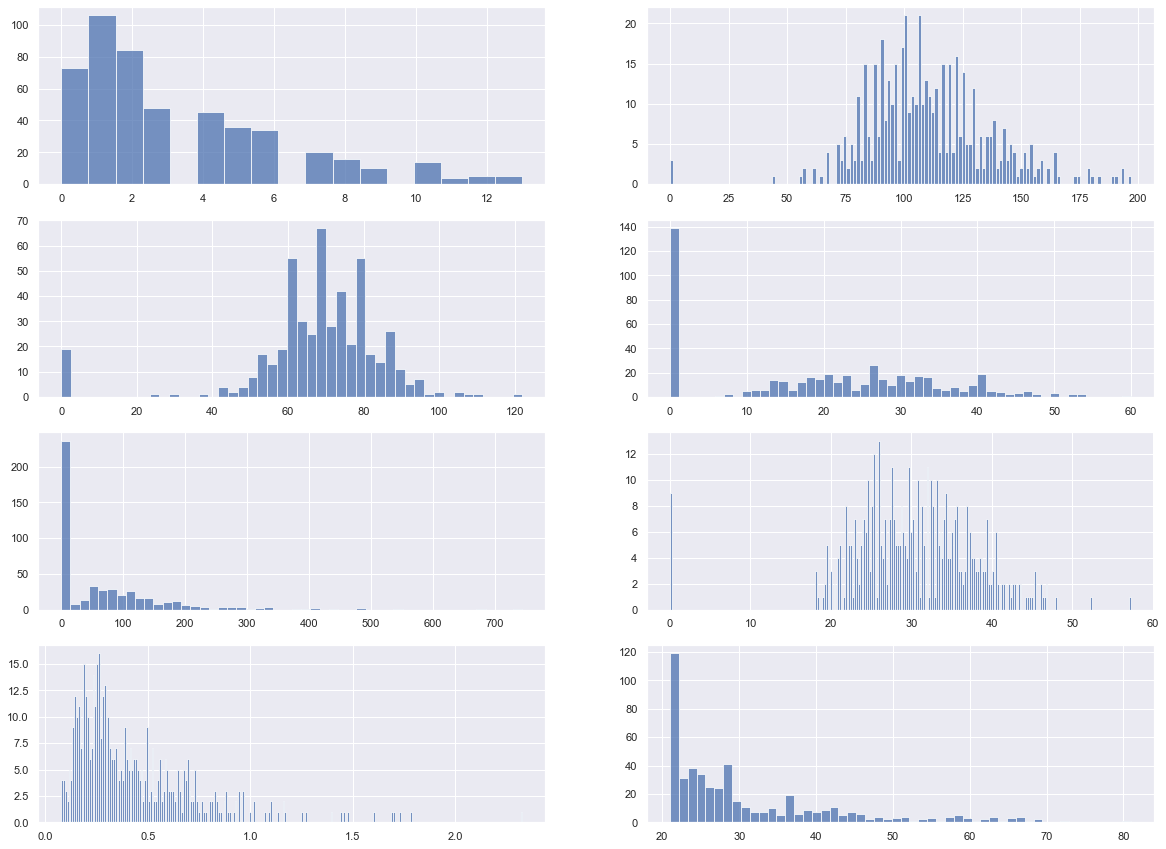

In [43]:
f, ax = plt.subplots(4,2,figsize = (20,15))
ax[0,0].hist(non_positive_patient['Pregnancies'], 17, facecolor='b', alpha=0.75)
ax[0,1].hist(non_positive_patient['Glucose'], 136, facecolor='b', alpha=0.75)
ax[1,0].hist(non_positive_patient['BloodPressure'], 47, facecolor='b', alpha=0.75)
ax[1,1].hist(non_positive_patient['SkinThickness'], 51, facecolor='b', alpha=0.75)
ax[2,0].hist(non_positive_patient['Insulin'], 50, facecolor='b', alpha=0.75)
ax[2,1].hist(non_positive_patient['BMI'], 248, facecolor='b', alpha=0.75)
ax[3,0].hist(non_positive_patient['DiabetesPedigreeFunction'], 250, facecolor='b', alpha=0.75)
ax[3,1].hist(non_positive_patient['Age'], 52, facecolor='b', alpha=0.75)
plt.grid(True)
plt.show()

scatter plot for contineous data.

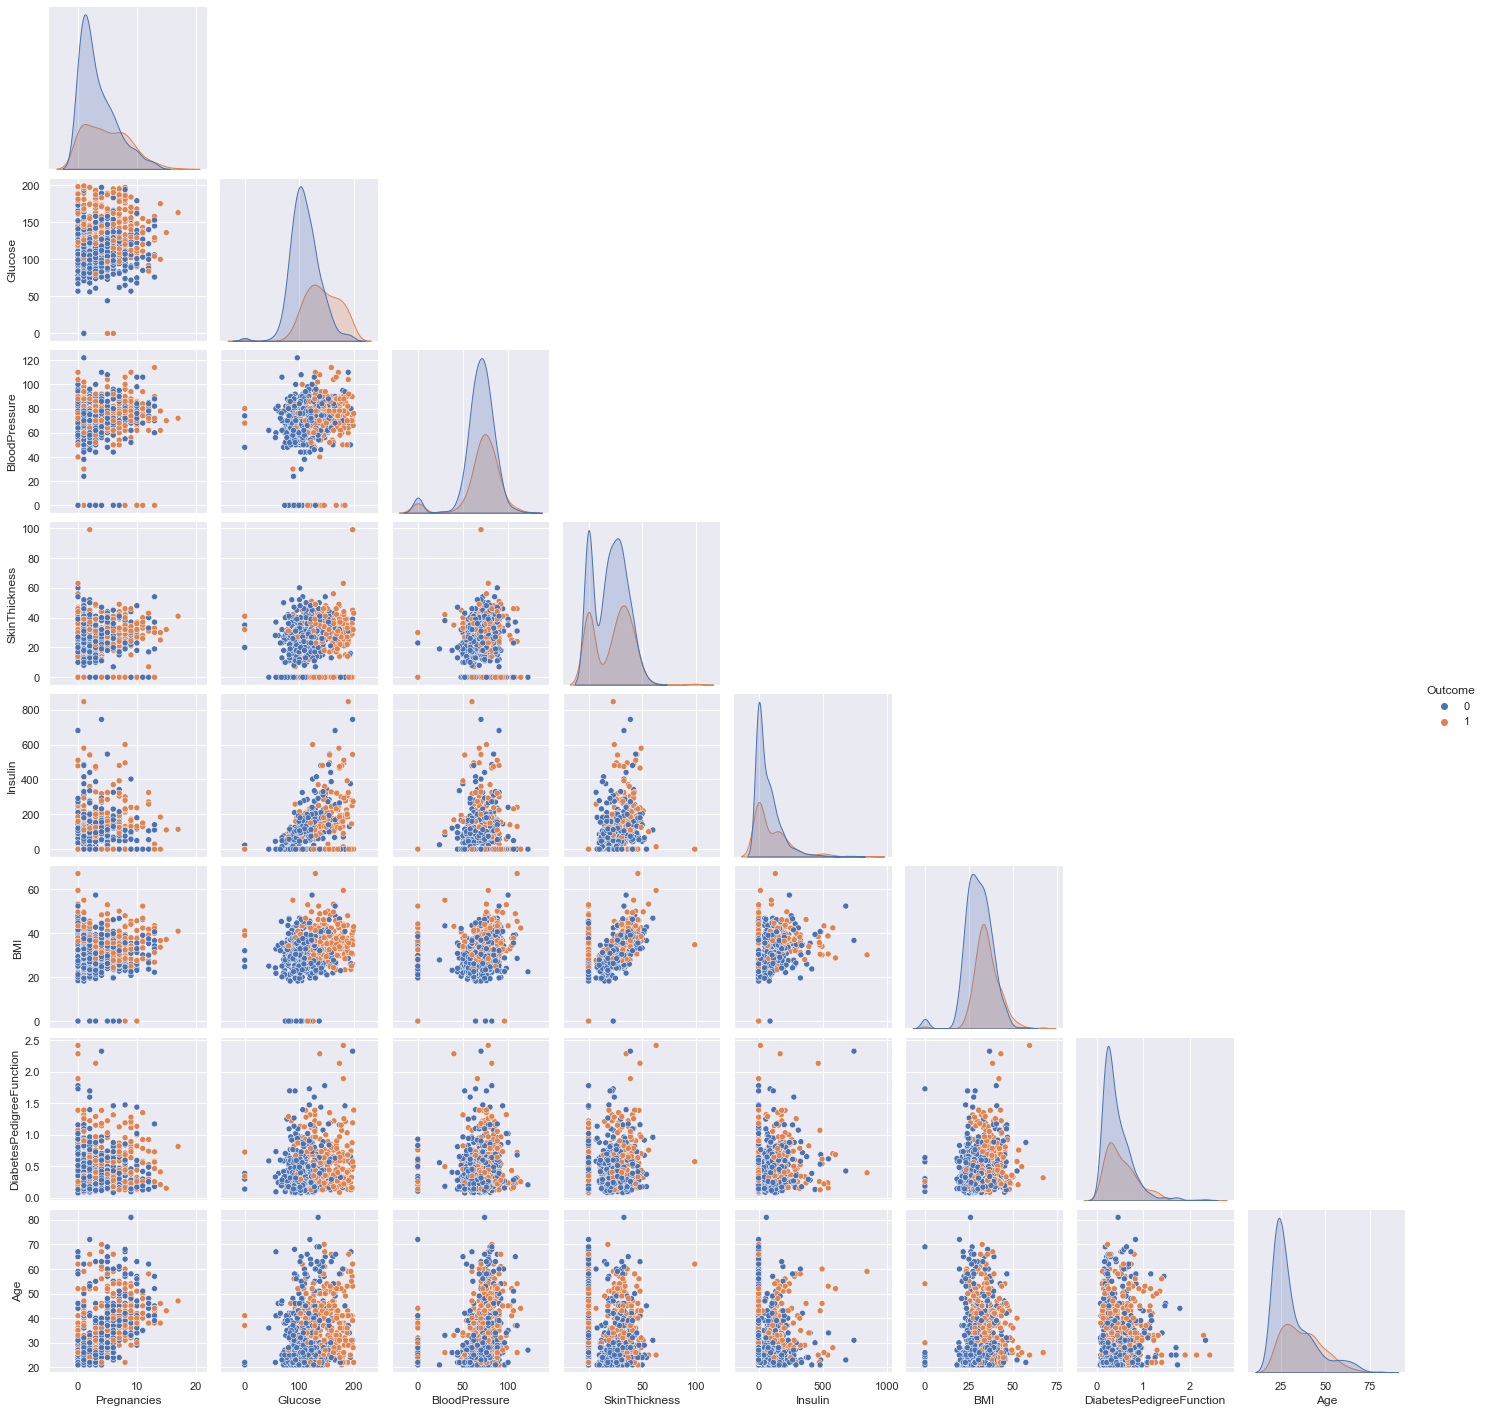

In [44]:
sns.pairplot(healthcare, diag_kind='kde', hue='Outcome', corner=True)

/Users/niru/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


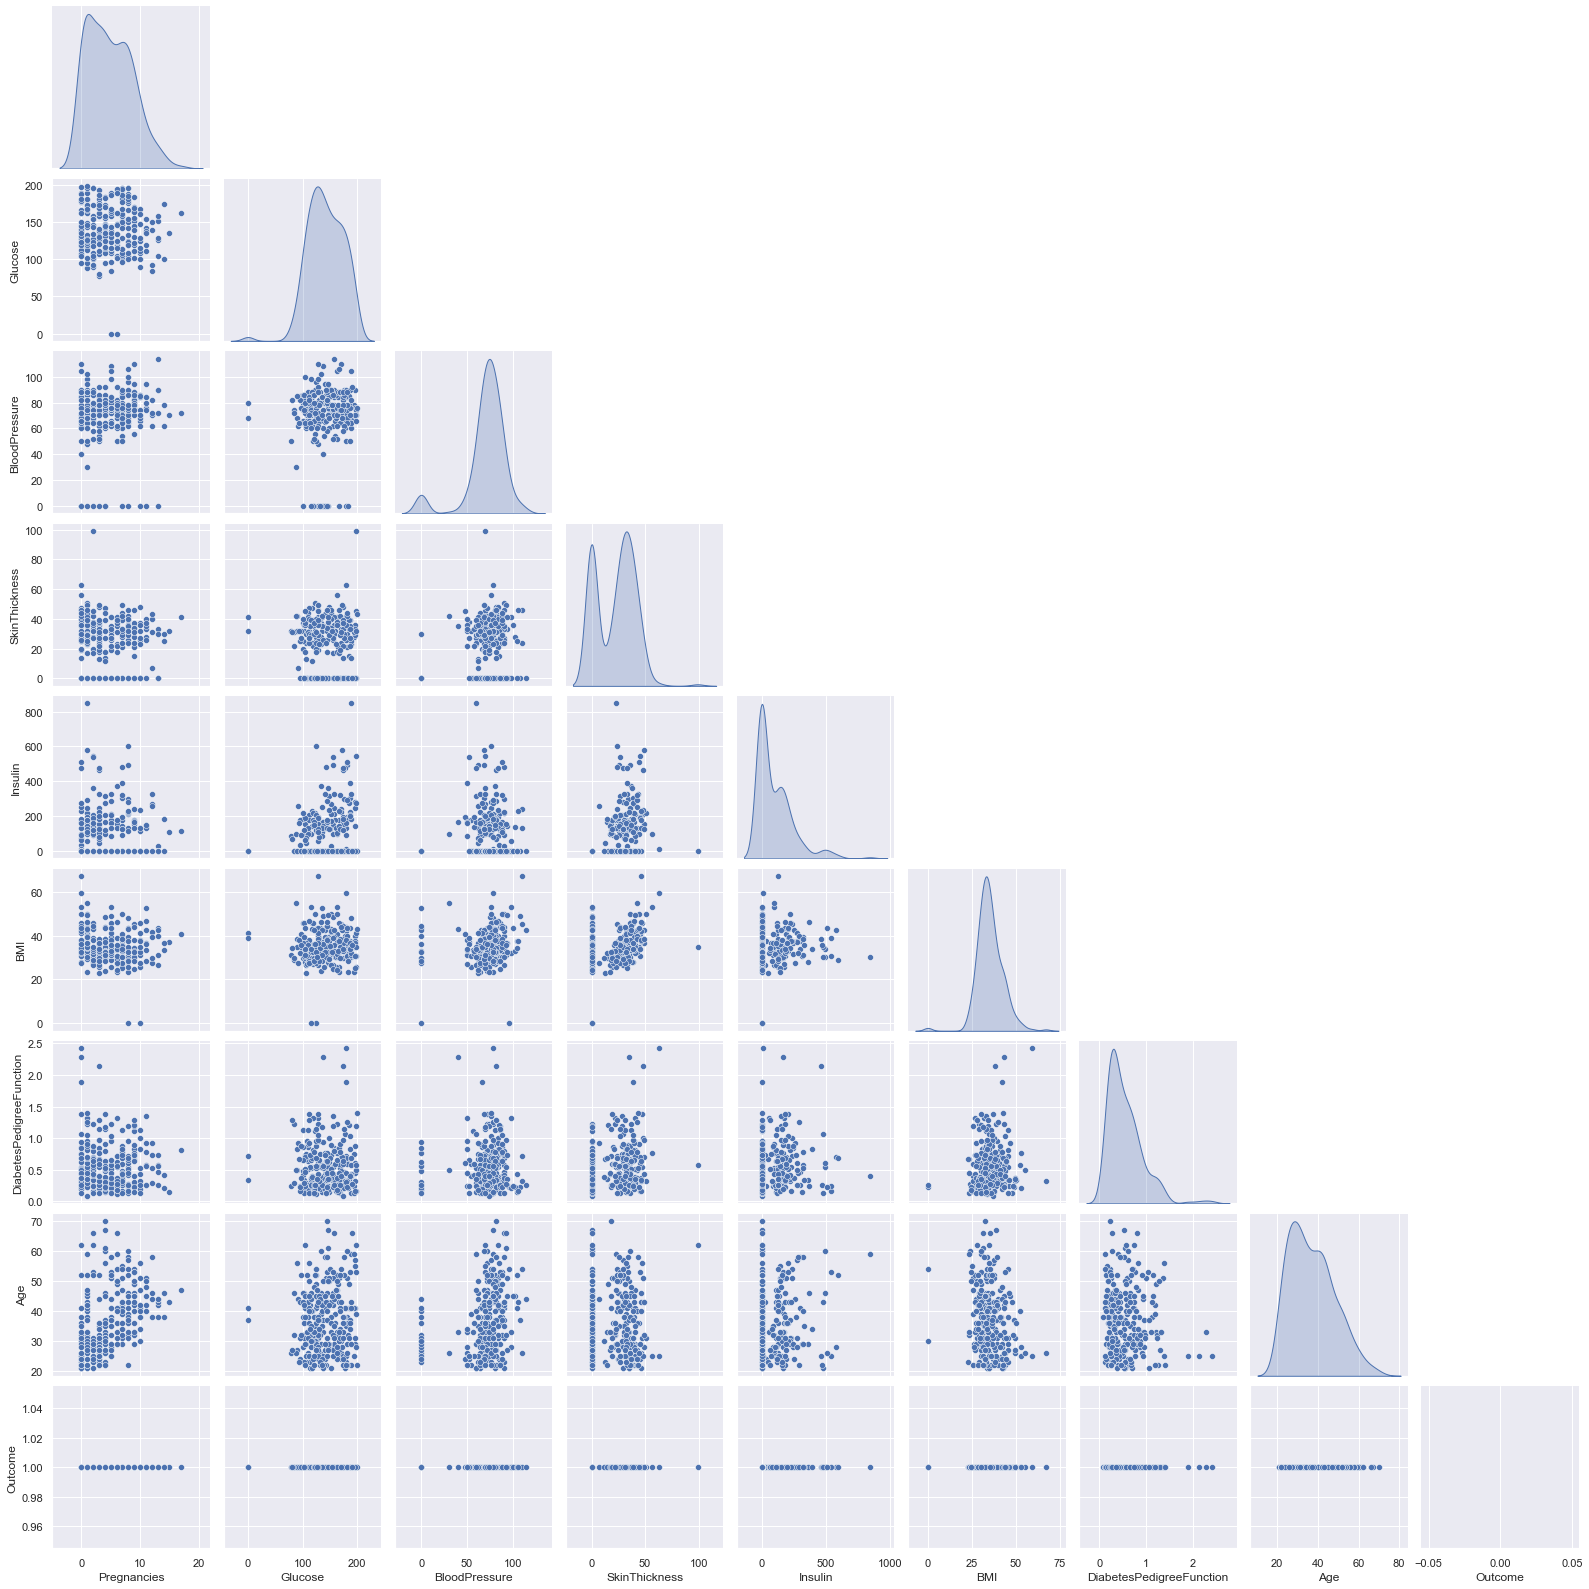

In [45]:
sns.pairplot(positive_patient, diag_kind='kde', corner=True)

/Users/niru/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


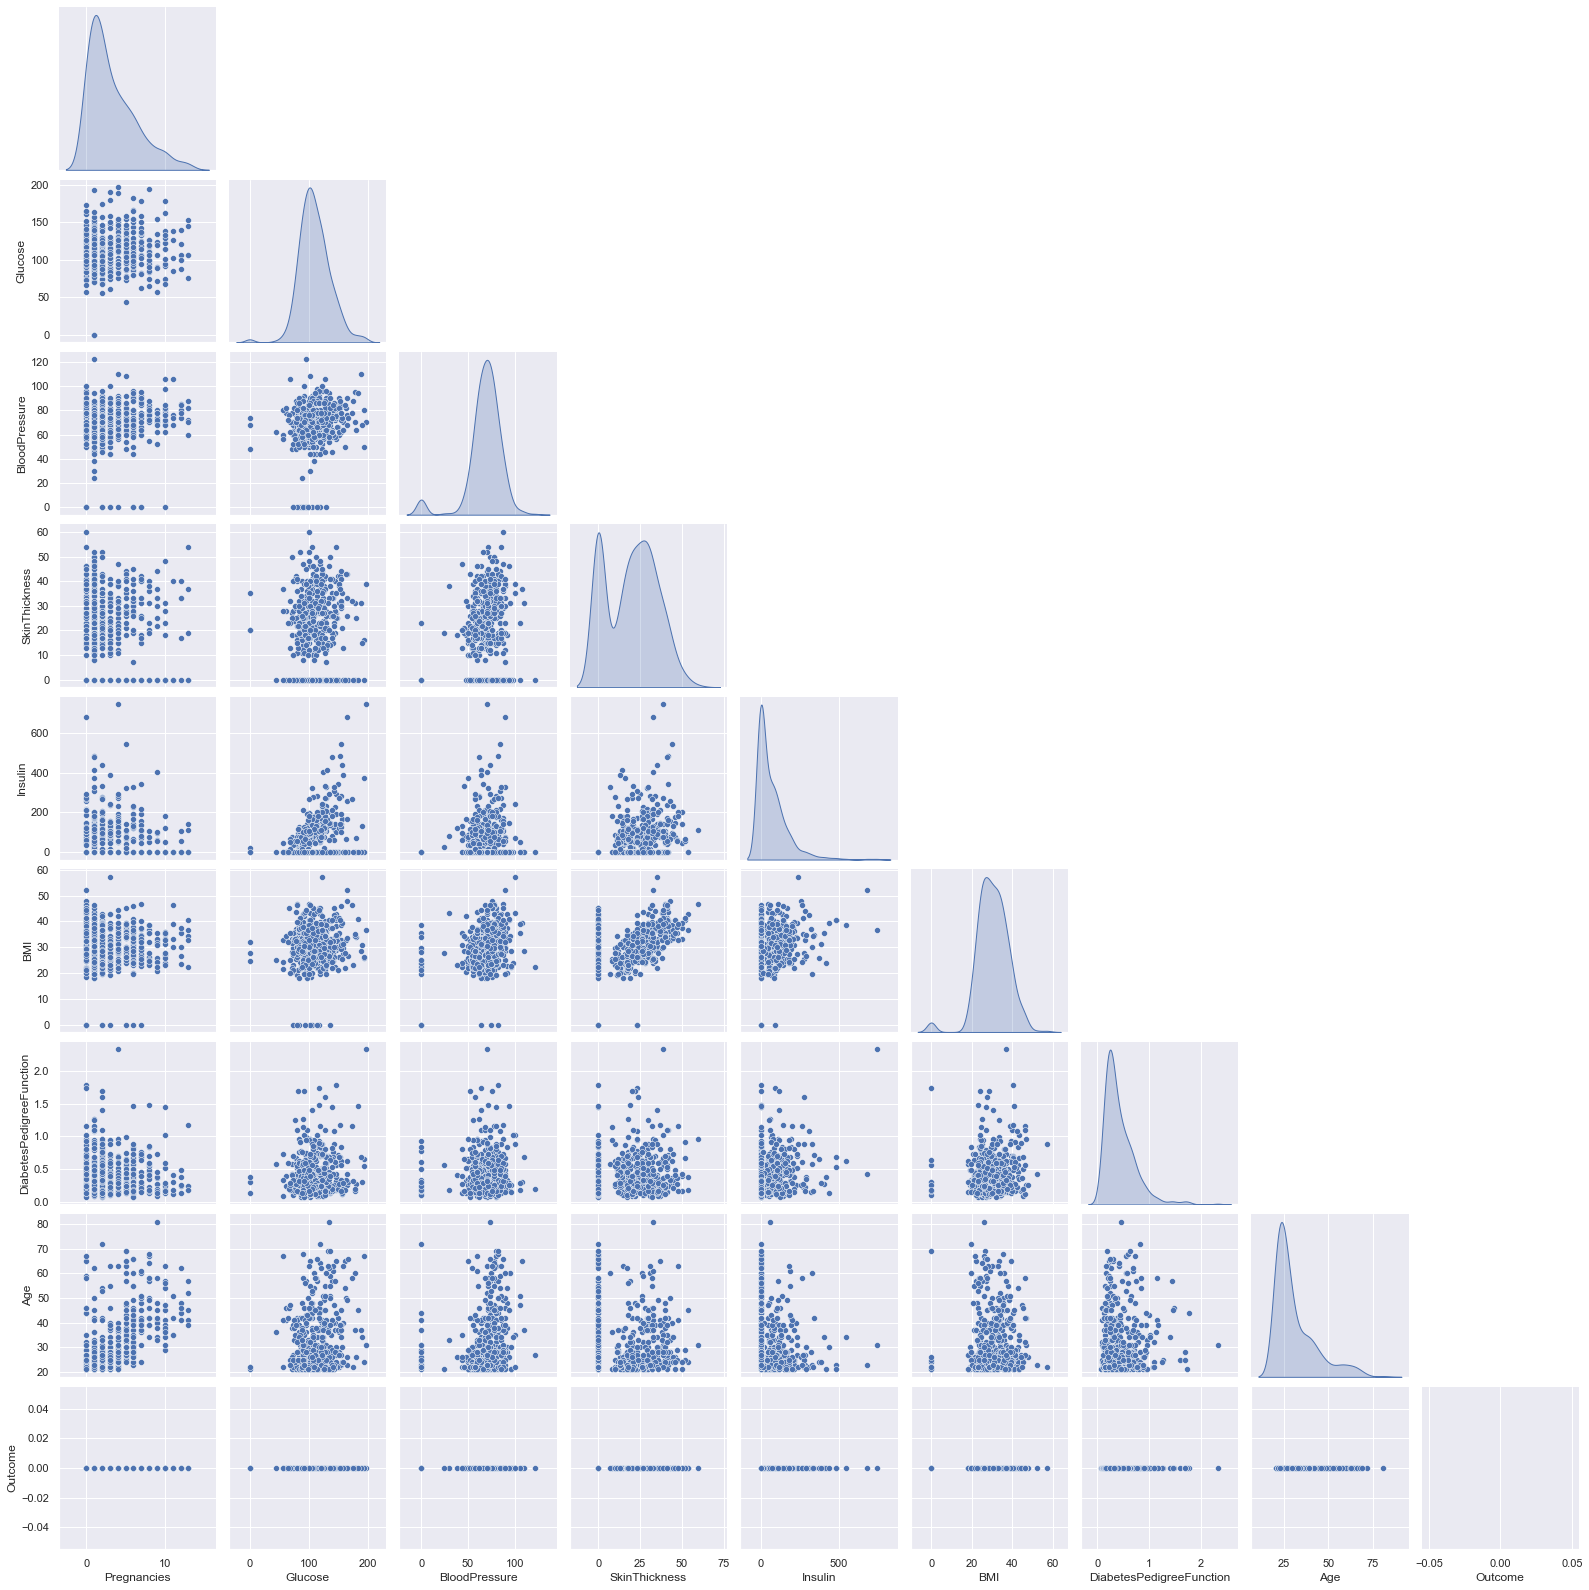

In [46]:
sns.pairplot(non_positive_patient, diag_kind='kde', corner=True)

# converting the missing values to nan

In [47]:
healthcare.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<AxesSubplot:>

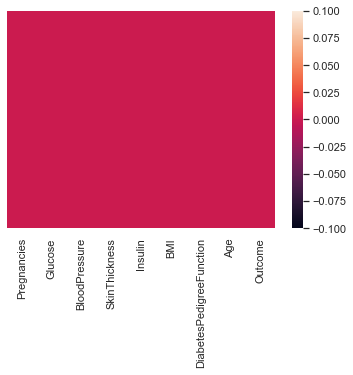

In [48]:
sns.heatmap(healthcare.isnull(), yticklabels=False)

In [49]:
healthcare[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = healthcare[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].astype('float')
healthcare[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = healthcare[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0.0, np.nan)
healthcare.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

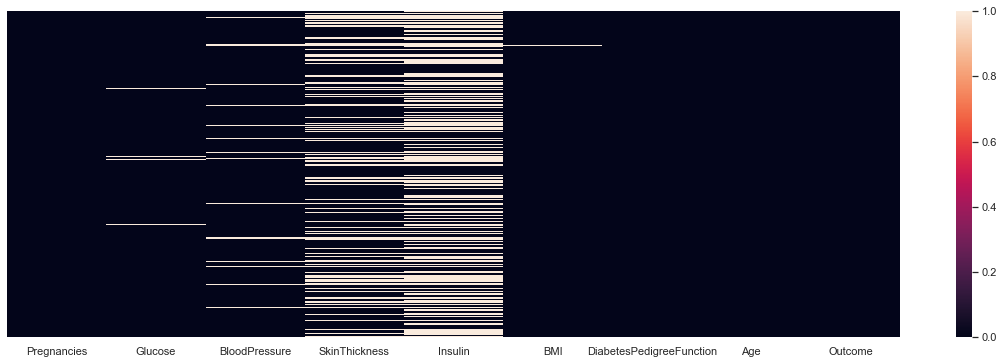

In [50]:
plt.figure(figsize=(20,6))
sns.heatmap(healthcare.isnull(), yticklabels=False)
plt.show()

In [51]:
from sklearn.impute import MissingIndicator

missing_indicator = MissingIndicator(missing_values = np.nan, features = 'all')
missing_indicator

MissingIndicator(features='all')

In [52]:
healthcare_missindicator = missing_indicator.fit_transform(healthcare)
healthcare_missindicator

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [53]:
# droping the duplicate values
duplicates = healthcare.drop_duplicates()
duplicates.shape, healthcare.shape # no duplicates values

((768, 9), (768, 9))

# droping the missing values

method 1: droping all missing values.

NOTE: In this method, Most of the data will be lost so this method is not good.

In [54]:
# df with no NAs
dropna_df = healthcare.dropna(how = 'any', axis = 0)
dropna_df.shape, #list(dropna_df.index)

((392, 9),)

In [55]:
# df that contains NAs rows.
missing_df = duplicates.drop(dropna_df.index) # data with missing values\
len(missing_df)

376

In [56]:
missing_df.isnull().sum(), missing_df.shape, dropna_df.isnull().sum(), dropna_df.shape

(Pregnancies                   0
 Glucose                       5
 BloodPressure                35
 SkinThickness               227
 Insulin                     374
 BMI                          11
 DiabetesPedigreeFunction      0
 Age                           0
 Outcome                       0
 dtype: int64,
 (376, 9),
 Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 (392, 9))

<AxesSubplot:>

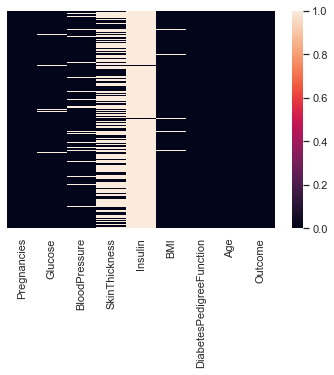

In [57]:
sns.heatmap(missing_df.isnull(), yticklabels=False)

<AxesSubplot:>

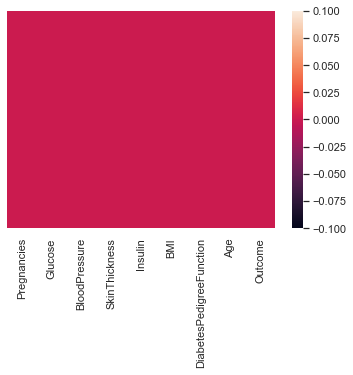

In [58]:
sns.heatmap(dropna_df.isnull(), yticklabels=False)

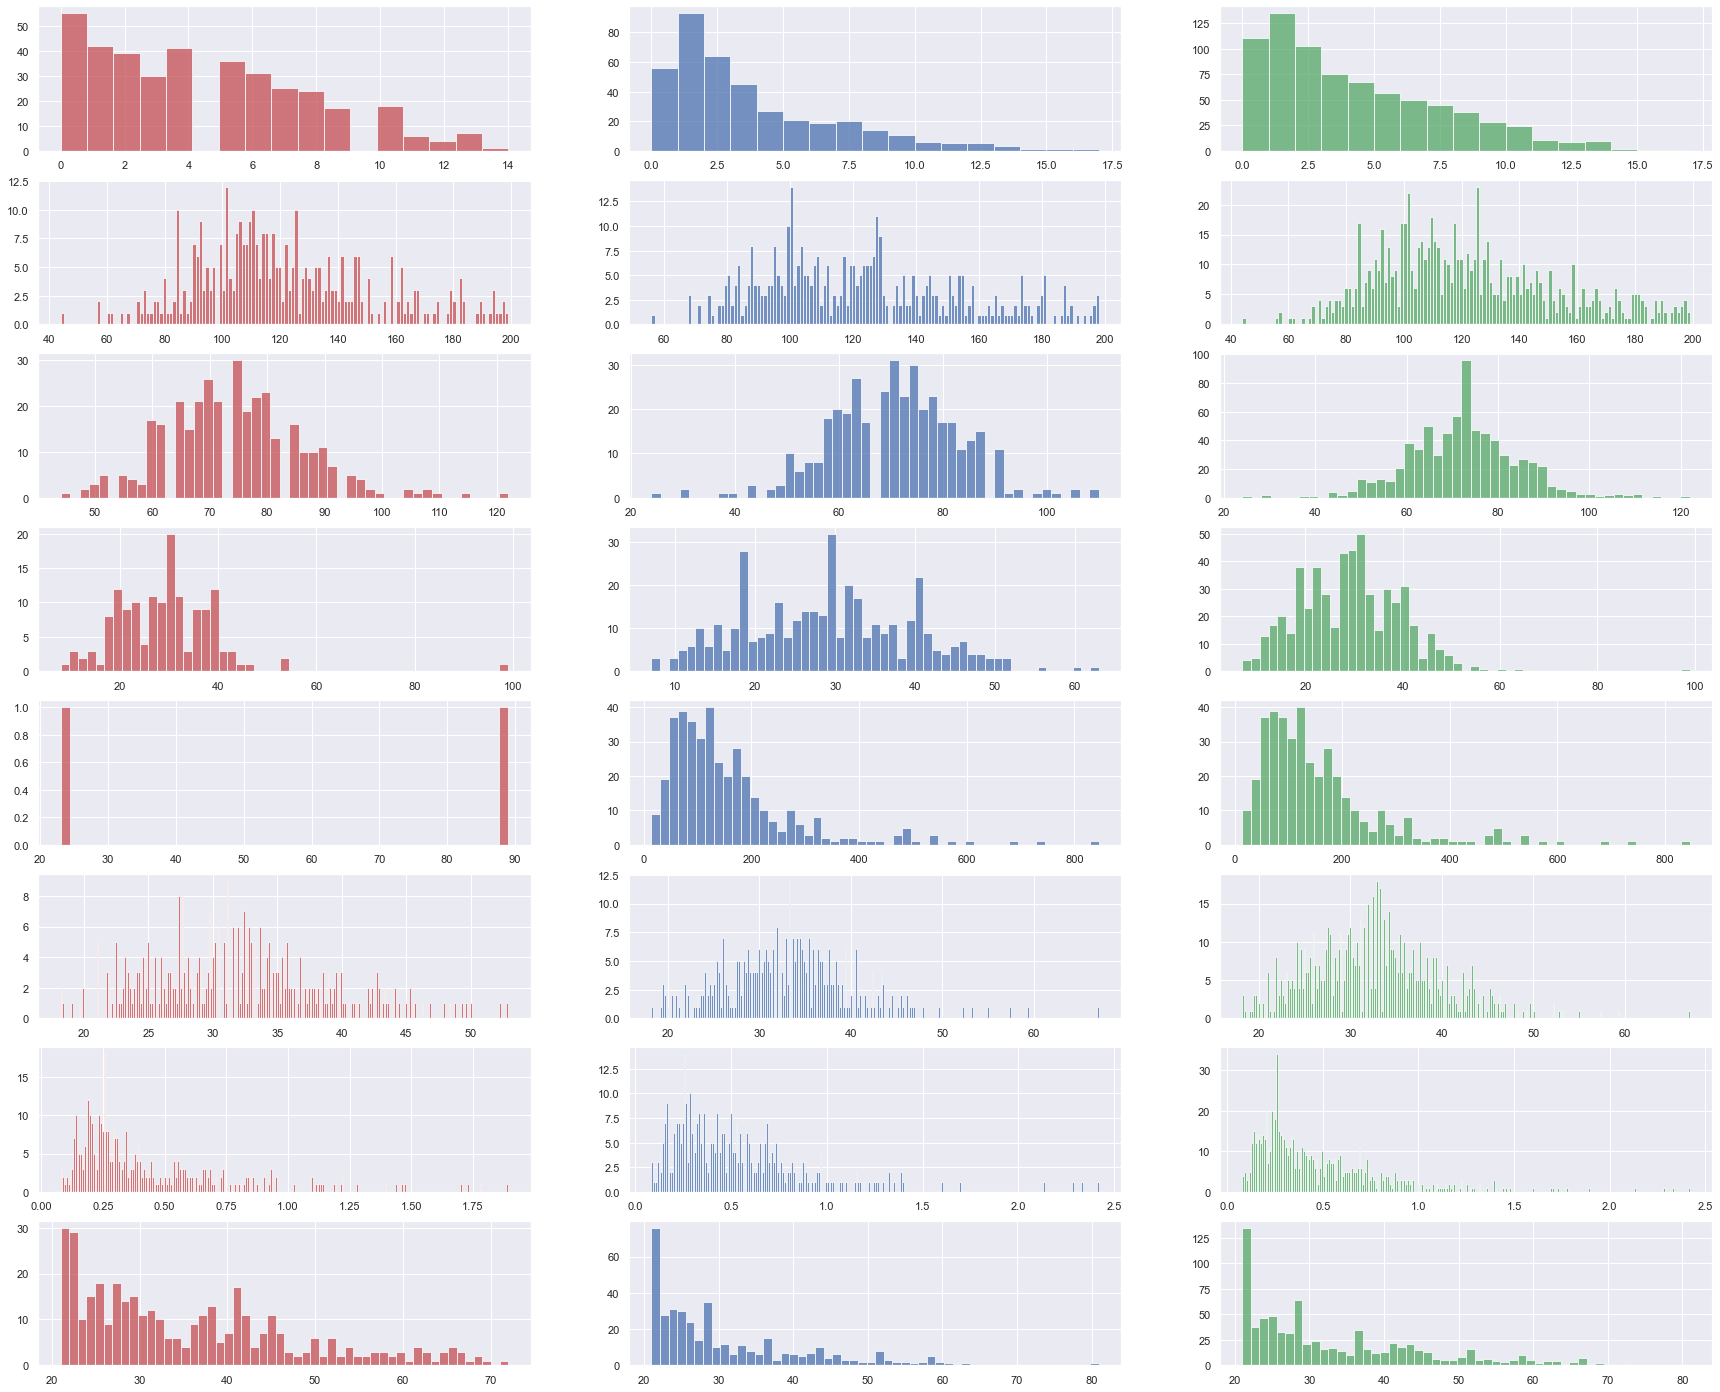

In [59]:
f, ax = plt.subplots(8,3,figsize = (30,25))
ax[0,0].hist(missing_df['Pregnancies'], 17, facecolor='r', alpha=0.75)
ax[0,1].hist(dropna_df['Pregnancies'], 17, facecolor='b', alpha=0.75)
ax[0,2].hist(healthcare['Pregnancies'], 17, facecolor='g', alpha=0.75)
ax[1,0].hist(missing_df['Glucose'], 136, facecolor='r', alpha=0.75)
ax[1,1].hist(dropna_df['Glucose'], 136, facecolor='b', alpha=0.75)
ax[1,2].hist(healthcare['Glucose'], 136, facecolor='g', alpha=0.75)
ax[2,0].hist(missing_df['BloodPressure'], 47, facecolor='r', alpha=0.75)
ax[2,1].hist(dropna_df['BloodPressure'], 47, facecolor='b', alpha=0.75)
ax[2,2].hist(healthcare['BloodPressure'], 47, facecolor='g', alpha=0.75)
ax[3,0].hist(missing_df['SkinThickness'], 51, facecolor='r', alpha=0.75)
ax[3,1].hist(dropna_df['SkinThickness'], 51, facecolor='b', alpha=0.75)
ax[3,2].hist(healthcare['SkinThickness'], 51, facecolor='g', alpha=0.75)
ax[4,0].hist(missing_df['Insulin'], 50, facecolor='r', alpha=0.75)
ax[4,1].hist(dropna_df['Insulin'], 50, facecolor='b', alpha=0.75)
ax[4,2].hist(healthcare['Insulin'], 50, facecolor='g', alpha=0.75)
ax[5,0].hist(missing_df['BMI'], 248, facecolor='r', alpha=0.75)
ax[5,1].hist(dropna_df['BMI'], 248, facecolor='b', alpha=0.75)
ax[5,2].hist(healthcare['BMI'], 248, facecolor='g', alpha=0.75)
ax[6,0].hist(missing_df['DiabetesPedigreeFunction'], 250, facecolor='r', alpha=0.75)
ax[6,1].hist(dropna_df['DiabetesPedigreeFunction'], 250, facecolor='b', alpha=0.75)
ax[6,2].hist(healthcare['DiabetesPedigreeFunction'], 250, facecolor='g', alpha=0.75)
ax[7,0].hist(missing_df['Age'], 52, facecolor='r', alpha=0.75)
ax[7,1].hist(dropna_df['Age'], 52, facecolor='b', alpha=0.75)
ax[7,2].hist(healthcare['Age'], 52, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

# COL 1 = LOST DATA( by row) / df containing only NAs rows
#COL 2 = REMAINING DATA(by row) / df with no NAs
#COL 3 = ORIGINAL DATA ( droped only np.nan cell)

In [60]:
healthcare.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
missing_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,376.000000,371.000000,341.000000,149.000000,2.000000,365.000000,376.000000,376.000000,376.000000
mean,4.412234,120.692722,74.407625,29.174497,56.000000,31.782192,0.418529,35.718085,0.367021
std,3.440583,30.198039,11.957811,10.407723,46.669048,6.757620,0.307390,12.740708,0.482635
min,0.000000,44.000000,44.000000,8.000000,23.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.500000,66.000000,22.000000,39.500000,26.800000,0.209000,25.000000,0.000000
50%,4.000000,115.000000,74.000000,30.000000,56.000000,31.200000,0.302500,32.000000,0.000000
75%,7.000000,138.000000,82.000000,35.000000,72.500000,35.700000,0.554750,43.000000,1.000000
max,14.000000,199.000000,122.000000,99.000000,89.000000,52.900000,1.893000,72.000000,1.000000


In [62]:
dropna_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


method 2: remove rows whose col features have less % of NAs data.

In [63]:
dropna_df_2 = healthcare[['Glucose', 'BloodPressure', 'BMI']].dropna(how = 'any')
missing_df_2 = healthcare.drop(dropna_df_2.index)

In [64]:
dropna_df_2.isnull().sum()

Glucose          0
BloodPressure    0
BMI              0
dtype: int64

In [65]:
dropna_df_2.shape, healthcare.shape

((724, 3), (768, 9))

In [66]:
# % of data lost is about 6 %.
(len(healthcare) - len(dropna_df_2))*100/len(healthcare)

5.729166666666667

Again this also not good if we remove the missing data(greater than 5 %) and outcome is highly 
dependent on these features glucose, BMI.

Hence, we are going to impute.

In [67]:
X_diabetes, y_diabetes = np.array(healthcare.iloc[:, 0:8]), np.array(healthcare.iloc[:, -1])
X_diabetes, y_diabetes

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # ignoring IterativeImputer for now.

In [69]:
# ignoring the IterativeImputer for the time being.
# impute with mean, median, KNN

imputer_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer_median = SimpleImputer(missing_values = np.nan, strategy = "median")

imputer_KNN = KNNImputer(missing_values = np.nan, weights = 'distance')

imputer_mean.fit(X_diabetes), imputer_median.fit(X_diabetes), imputer_KNN.fit(X_diabetes)

(SimpleImputer(),
 SimpleImputer(strategy='median'),
 KNNImputer(weights='distance'))

In [70]:
mean_imputdf = imputer_mean.transform(X_diabetes)
median_imputdf = imputer_median.transform(X_diabetes)
knn_imputdf = imputer_KNN.transform(X_diabetes)
mean_imputdf, median_imputdf, knn_imputdf

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
    

In [71]:
X_diabetes_meanimputed = pd.DataFrame(mean_imputdf).join(pd.DataFrame(y_diabetes, columns = [8]))
X_diabetes_medianimputed = pd.DataFrame(median_imputdf).join(pd.DataFrame(y_diabetes, columns = [8]))
X_diabetes_knnimputed = pd.DataFrame(knn_imputdf).join(pd.DataFrame(y_diabetes, columns = [8]))
#X_diabetes_meanimputed, X_diabetes_medianimputed, X_diabetes_knnimputed

In [72]:
X_diabetes_meanimputed.columns = healthcare.columns
X_diabetes_medianimputed.columns = healthcare.columns
X_diabetes_knnimputed.columns = healthcare.columns

In [73]:
X_diabetes_meanimputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [74]:
X_diabetes_medianimputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
X_diabetes_knnimputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.590922,72.391584,29.111609,153.370728,32.429996,0.471876,33.240885,0.348958
std,3.369578,30.512051,12.208105,9.449438,98.613435,6.884513,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,88.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.448450,32.093963,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


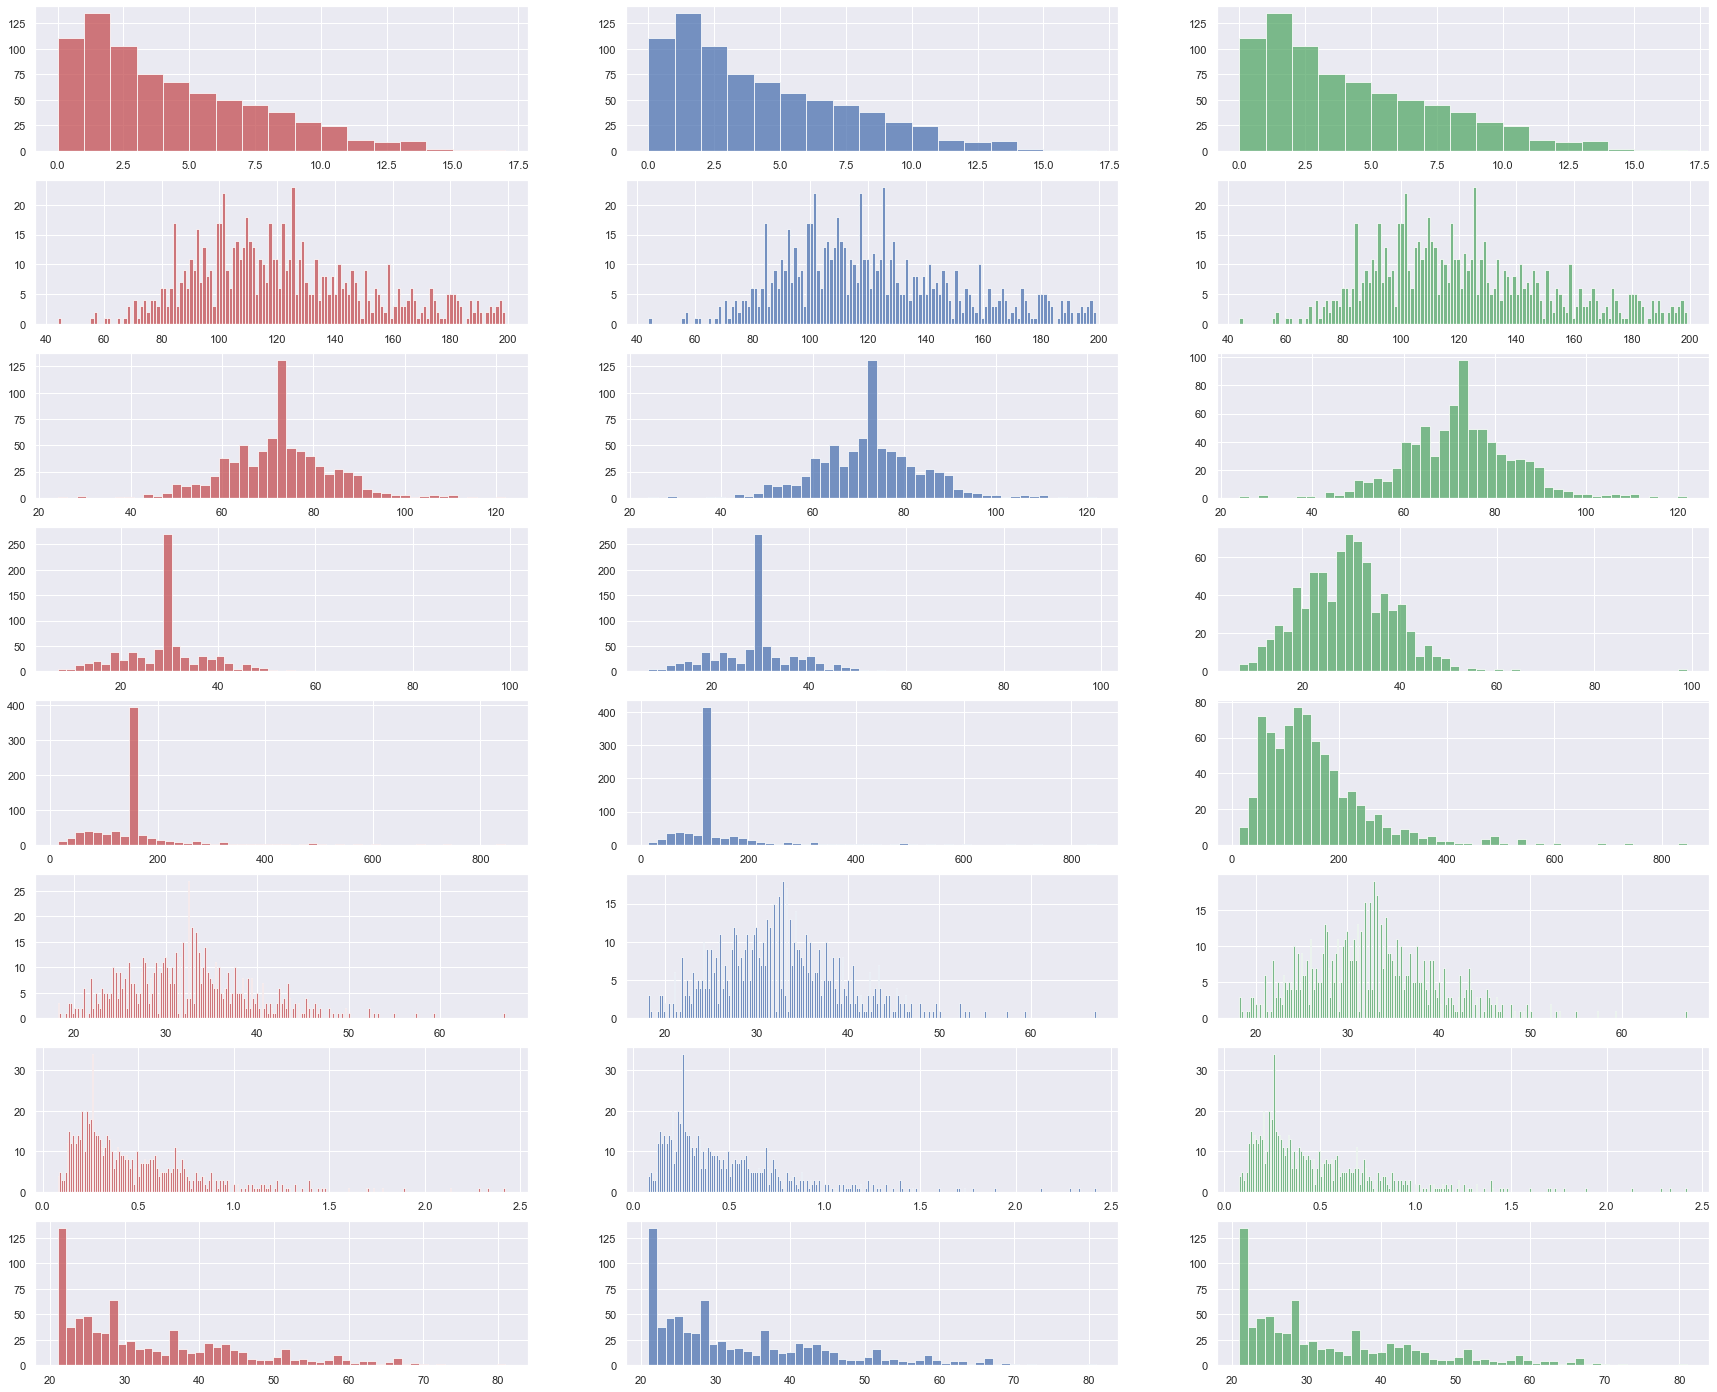

In [76]:
f, ax = plt.subplots(8,3,figsize = (30,25))
ax[0,0].hist(X_diabetes_meanimputed['Pregnancies'], 17, facecolor='r', alpha=0.75)
ax[0,1].hist(X_diabetes_medianimputed['Pregnancies'], 17, facecolor='b', alpha=0.75)
ax[0,2].hist(X_diabetes_knnimputed['Pregnancies'], 17, facecolor='g', alpha=0.75)
ax[1,0].hist(X_diabetes_meanimputed['Glucose'], 136, facecolor='r', alpha=0.75)
ax[1,1].hist(X_diabetes_medianimputed['Glucose'], 136, facecolor='b', alpha=0.75)
ax[1,2].hist(X_diabetes_knnimputed['Glucose'], 136, facecolor='g', alpha=0.75)
ax[2,0].hist(X_diabetes_meanimputed['BloodPressure'], 47, facecolor='r', alpha=0.75)
ax[2,1].hist(X_diabetes_medianimputed['BloodPressure'], 47, facecolor='b', alpha=0.75)
ax[2,2].hist(X_diabetes_knnimputed['BloodPressure'], 47, facecolor='g', alpha=0.75)
ax[3,0].hist(X_diabetes_meanimputed['SkinThickness'], 51, facecolor='r', alpha=0.75)
ax[3,1].hist(X_diabetes_medianimputed['SkinThickness'], 51, facecolor='b', alpha=0.75)
ax[3,2].hist(X_diabetes_knnimputed['SkinThickness'], 51, facecolor='g', alpha=0.75)
ax[4,0].hist(X_diabetes_meanimputed['Insulin'], 50, facecolor='r', alpha=0.75)
ax[4,1].hist(X_diabetes_medianimputed['Insulin'], 50, facecolor='b', alpha=0.75)
ax[4,2].hist(X_diabetes_knnimputed['Insulin'], 50, facecolor='g', alpha=0.75)
ax[5,0].hist(X_diabetes_meanimputed['BMI'], 248, facecolor='r', alpha=0.75)
ax[5,1].hist(X_diabetes_medianimputed['BMI'], 248, facecolor='b', alpha=0.75)
ax[5,2].hist(X_diabetes_knnimputed['BMI'], 248, facecolor='g', alpha=0.75)
ax[6,0].hist(X_diabetes_meanimputed['DiabetesPedigreeFunction'], 250, facecolor='r', alpha=0.75)
ax[6,1].hist(X_diabetes_medianimputed['DiabetesPedigreeFunction'], 250, facecolor='b', alpha=0.75)
ax[6,2].hist(X_diabetes_knnimputed['DiabetesPedigreeFunction'], 250, facecolor='g', alpha=0.75)
ax[7,0].hist(X_diabetes_meanimputed['Age'], 52, facecolor='r', alpha=0.75)
ax[7,1].hist(X_diabetes_medianimputed['Age'], 52, facecolor='b', alpha=0.75)
ax[7,2].hist(X_diabetes_knnimputed['Age'], 52, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

# col for X_diabetes_meanimputed
# col for X_diabetes_medianimputed
# col for X_diabetes_knnimputed

# group by data description

In [77]:
X_diabetes_knnimputed.groupby(['Pregnancies', 'Age'])['Outcome'].value_counts()

Pregnancies  Age   Outcome
0.0          21.0  0          18
                   1           3
             22.0  0          13
                   1           4
             23.0  0           6
                              ..
13.0         57.0  0           1
14.0         38.0  1           1
             46.0  1           1
15.0         43.0  1           1
17.0         47.0  1           1
Name: Outcome, Length: 385, dtype: int64

In [78]:
X_diabetes_knnimputed.groupby(['Pregnancies', 'Age'])['Outcome'].describe()
# here, there is a huge class imbalace.

count      mean       std  min  25%  50%   75%  max
Pregnancies Age                                                      
0.0         21.0   21.0  0.142857  0.358569  0.0  0.0  0.0  0.00  1.0
            22.0   17.0  0.235294  0.437237  0.0  0.0  0.0  0.00  1.0
            23.0    8.0  0.250000  0.462910  0.0  0.0  0.0  0.25  1.0
            24.0    9.0  0.444444  0.527046  0.0  0.0  0.0  1.00  1.0
            25.0   13.0  0.461538  0.518875  0.0  0.0  0.0  1.00  1.0
...                 ...       ...       ...  ...  ...  ...   ...  ...
13.0        57.0    1.0  0.000000       NaN  0.0  0.0  0.0  0.00  0.0
14.0        38.0    1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
            46.0    1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
15.0        43.0    1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
17.0        47.0    1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0

[292 rows x 8 columns]

In [79]:
X_diabetes_medianimputed.groupby(['Pregnancies', 'Age'])['Outcome'].describe()

count      mean       std  min  25%  50%   75%  max
Pregnancies Age                                                      
0.0         21.0   21.0  0.142857  0.358569  0.0  0.0  0.0  0.00  1.0
            22.0   17.0  0.235294  0.437237  0.0  0.0  0.0  0.00  1.0
            23.0    8.0  0.250000  0.462910  0.0  0.0  0.0  0.25  1.0
            24.0    9.0  0.444444  0.527046  0.0  0.0  0.0  1.00  1.0
            25.0   13.0  0.461538  0.518875  0.0  0.0  0.0  1.00  1.0
...                 ...       ...       ...  ...  ...  ...   ...  ...
13.0        57.0    1.0  0.000000       NaN  0.0  0.0  0.0  0.00  0.0
14.0        38.0    1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
            46.0    1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
15.0        43.0    1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
17.0        47.0    1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0

[292 rows x 8 columns]

# outliers

<AxesSubplot:>

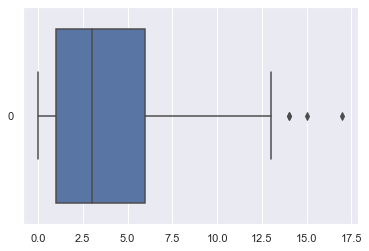

In [80]:
sns.boxplot(data=X_diabetes_knnimputed['Pregnancies'],orient="h")

<AxesSubplot:>

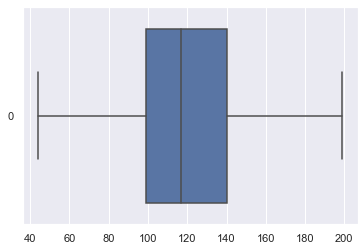

In [81]:
sns.boxplot(data=X_diabetes_knnimputed['Glucose'],orient="h")

<AxesSubplot:>

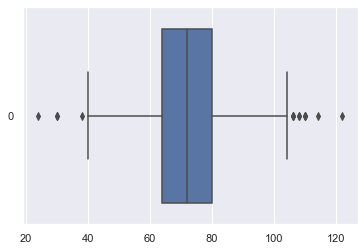

In [82]:
sns.boxplot(data=X_diabetes_knnimputed['BloodPressure'],orient="h")

<AxesSubplot:>

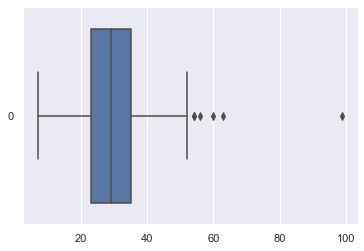

In [83]:
sns.boxplot(data=X_diabetes_knnimputed['SkinThickness'],orient="h")

<AxesSubplot:>

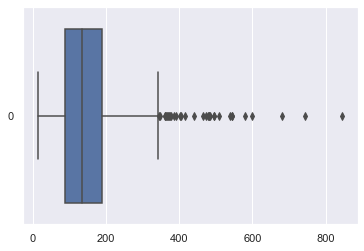

In [84]:
sns.boxplot(data=X_diabetes_knnimputed['Insulin'],orient="h")

<AxesSubplot:>

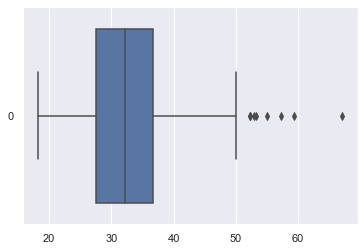

In [85]:
sns.boxplot(data=X_diabetes_knnimputed['BMI'],orient="h")

<AxesSubplot:>

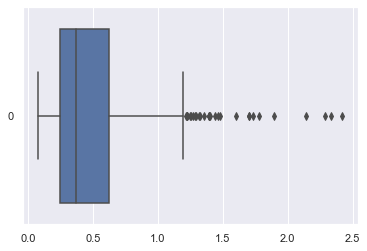

In [86]:
sns.boxplot(data=X_diabetes_knnimputed['DiabetesPedigreeFunction'],orient="h")

<AxesSubplot:>

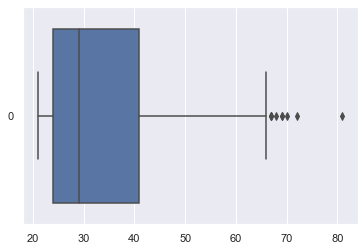

In [87]:
sns.boxplot(data=X_diabetes_knnimputed['Age'],orient="h")

In [88]:
#######. stats. ########

In [89]:
# for bmi

In [90]:
healthcare.BMI.skew(), healthcare.BMI.kurt()

(0.5939697505712673, 0.8633790277785045)

In [91]:
X_diabetes_medianimputed.BMI.skew(), X_diabetes_medianimputed.BMI.kurt()

(0.599232520287425, 0.9202217134186936)

In [92]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [93]:
lm.fit(np.array(X_diabetes_medianimputed['Glucose']).reshape(-1,1), np.array(X_diabetes_medianimputed['BMI']).reshape(-1,1))

LinearRegression()

In [94]:
print(lm.coef_, lm.intercept_)

[[0.05218755]] [26.10626641]


In [95]:
x_new = pd.DataFrame({'Glucose': 
                      [X_diabetes_medianimputed.Glucose.min(),
                       X_diabetes_medianimputed.Glucose.max()]})
preds = lm.predict(x_new)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


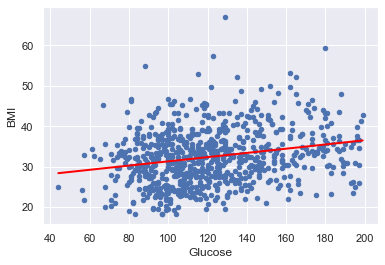

In [96]:
X_diabetes_medianimputed.plot(kind = 'scatter', x = 'Glucose', y = 'BMI')
plt.plot(x_new, preds,c = 'red', linewidth = 2 )

In [97]:
import statsmodels.formula.api as smf
stats_f = smf.ols(formula = 'BMI ~ Glucose', data = X_diabetes_medianimputed).fit()

In [98]:
stats_f.conf_int()

,0,1
Intercept,24.151595,28.060938
Glucose,0.036600,0.067775


In [99]:
stats_f.pvalues

Intercept    1.222819e-108
Glucose       9.144385e-11
dtype: float64

In [100]:
stats_f.rsquared

0.05338343264304268

In [101]:
stats_f.rsquared_adj

0.05214764077965239

In [102]:
stats_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     43.20
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           9.14e-11
Time:                        03:45:03   Log-Likelihood:                -2548.8
No. Observations:                 768   AIC:                             5102.
Df Residuals:                     766   BIC:                             5111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.1063      0.996     26.218      0.000      24.152      28.061
Glucose        0.0522      0.008      6.572      0.000       0.037       0.068
==============================================================================
Omnibus:                       57.681   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.235
Skew:                           0.622   Prob(JB):                     2.79e-17
Kurtosis:                       3.915   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
n = len(healthcare)

con_coef = .95

alpha = 1. - con_coef

In [104]:
x_bar = healthcare["BMI"].mean()
sigma = healthcare["BMI"].std()
sigma, x_bar

(6.924988332105907, 32.45746367239099)

In [105]:
z_critical = stats.norm.ppf(q = 0.975) # 95% level of confidence
z_critical

1.959963984540054

In [106]:
zinterval = stats.norm.interval(alpha = con_coef)
zinterval

(-1.959963984540054, 1.959963984540054)

In [107]:
standard_error = sigma / mt.sqrt(n)
standard_error

0.2498839923547727

In [108]:
ci_lower = x_bar - z_critical * standard_error
ci_upper = x_bar + z_critical * standard_error
ci_lower, ci_upper

(31.967700047062557, 32.94722729771943)

# Perform correlation analysis. Visually explore it using a heat map.

In [109]:
corr_knn = X_diabetes_knnimputed.corr()
corr_knn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.131688,0.218768,0.104355,0.060195,0.023590,-0.033523,0.544341,0.221898
Glucose,0.131688,1.000000,0.233014,0.247320,0.628004,0.238120,0.139550,0.270567,0.496217
BloodPressure,0.218768,0.233014,1.000000,0.227118,0.133365,0.294095,0.004748,0.336885,0.176420
SkinThickness,0.104355,0.247320,0.227118,1.000000,0.242009,0.639746,0.112008,0.148923,0.278846
Insulin,0.060195,0.628004,0.133365,0.242009,1.000000,0.250005,0.138180,0.238305,0.319964
BMI,0.023590,0.238120,0.294095,0.639746,0.250005,1.000000,0.154709,0.028033,0.313881
DiabetesPedigreeFunction,-0.033523,0.139550,0.004748,0.112008,0.138180,0.154709,1.000000,0.033561,0.173844
Age,0.544341,0.270567,0.336885,0.148923,0.238305,0.028033,0.033561,1.000000,0.238356
Outcome,0.221898,0.496217,0.176420,0.278846,0.319964,0.313881,0.173844,0.238356,1.000000


In [110]:
corr_median = X_diabetes_medianimputed.corr()
corr_median

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [111]:
#corr_knn.to_excel("corr_knn.xlsx")

<AxesSubplot:>

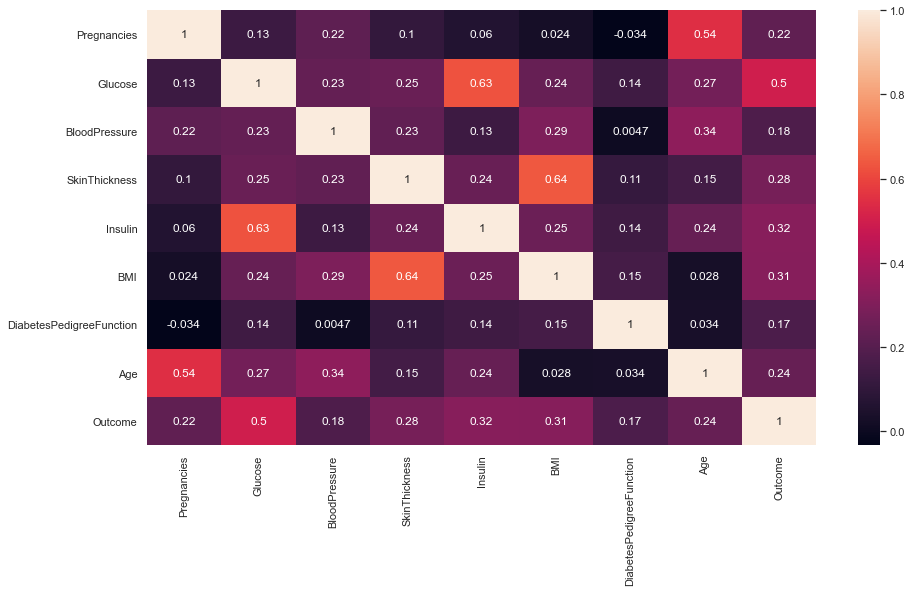

In [112]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_knn, annot=True)

<AxesSubplot:>

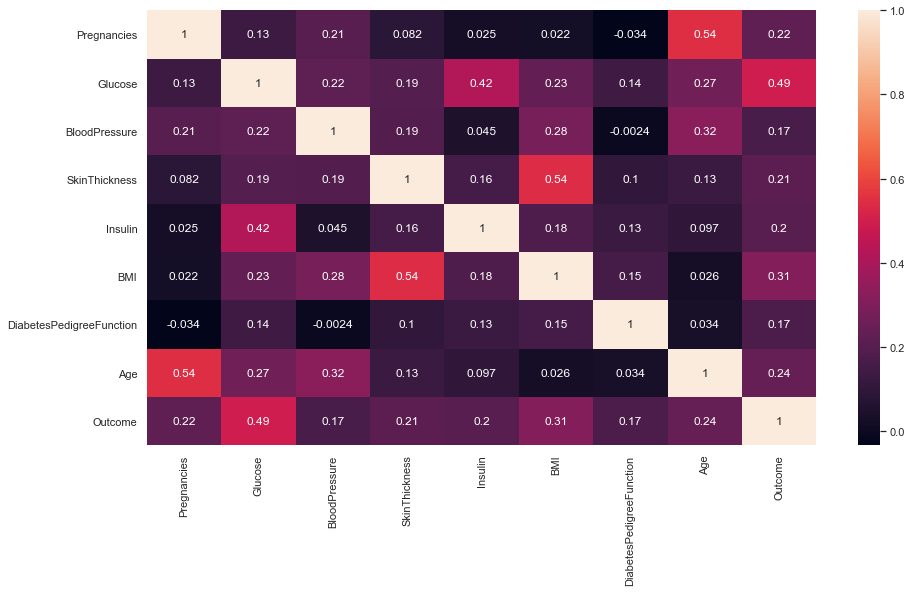

In [113]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_median, annot=True)

Data Modeling:
1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

data is imbalnced. 

In [114]:
healthcare['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [115]:
###################

In [116]:
X_diabetes_knnimputed.shape, y_diabetes.shape, X_diabetes_medianimputed.shape

((768, 9), (768,), (768, 9))

In [117]:
#Train test split for X_diabetes_knnimputed
from sklearn.model_selection import train_test_split
X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(X_diabetes_knnimputed,
                                                y_diabetes,
                                                test_size=0.25,
                                                random_state =17850)

In [118]:
#Train test split for X_diabetes_medianimputed
from sklearn.model_selection import train_test_split
X_train_median,X_test_median,y_train_median,y_test_median = train_test_split(X_diabetes_medianimputed,
                                                y_diabetes,
                                                test_size=0.25,
                                                random_state =17960)

In [119]:
pipelines0 = {
    'logr':make_pipeline(LogisticRegression()),
    'deciC':make_pipeline(DecisionTreeClassifier(max_depth=5)),
    'randfC':make_pipeline(RandomForestClassifier(n_estimators=11)),
    'svc':make_pipeline(SVC(kernel='rbf',gamma='auto')),
    'knn':make_pipeline(KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2))
}

In [120]:
fit_models0 = {}
fit_predict0 = {}
for algo, pipeline in pipelines0.items():
    model0 = pipeline.fit(X_train_median, y_train_median)
    fit_predict0[algo] = model0.predict(X_test_median)
    fit_models0[algo] = model0
    cm = confusion_matrix(y_test_median,model0.predict(X_test_median))
    print(algo)
    print("rmse score: {}" .format(np.sqrt(mean_squared_error(np.array(y_test_median),model0.predict(X_test_median)))))
    print("R2 score: {}" .format(model0.score(X_test_median, y_test_median)))
    print("confusion matrix\n", cm)
    print("classification report\n", classification_report(y_test_median,model0.predict(X_test_median)))
    
y_test_median, fit_predict0

/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logr
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

deciC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

randfC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   

(array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]),
 {'logr': array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
         1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [121]:
pipelines1 = {
    'logr':make_pipeline(StandardScaler(), LogisticRegression()),
    'deciC':make_pipeline(StandardScaler() ,DecisionTreeClassifier(max_depth=5)),
    'randfC':make_pipeline(StandardScaler() , RandomForestClassifier(n_estimators=11)),
    'svc':make_pipeline(StandardScaler(), SVC(kernel='rbf',gamma='auto')),
    'knn':make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2))
}

In [122]:
fit_models1 = {}
fit_predict1 = {}
for algo, pipeline in pipelines1.items():
    model1 = pipeline.fit(X_train_median, y_train_median)
    fit_predict1[algo] = model1.predict(X_test_median)
    fit_models1[algo] = model1
    cm = confusion_matrix(y_test_median,model1.predict(X_test_median))
    print(algo)
    print("rmse score: {}" .format(np.sqrt(mean_squared_error(np.array(y_test_median),model1.predict(X_test_median)))))
    print("R2 score: {}" .format(model1.score(X_test_median, y_test_median)))
    print("confusion matrix\n", cm)
    print("classification report\n", classification_report(y_test_median,model1.predict(X_test_median)))


y_test_median, fit_predict1

logr
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

deciC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

randfC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   

(array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]),
 {'logr': array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
         1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [123]:
pipelines2 = {
    'logr':make_pipeline(MinMaxScaler(), LogisticRegression()),
    'deciC':make_pipeline(MinMaxScaler() ,DecisionTreeClassifier(max_depth=5)),
    'randfC':make_pipeline(MinMaxScaler() , RandomForestClassifier(n_estimators=11)),
    'svc':make_pipeline(MinMaxScaler(), SVC(kernel='rbf',gamma='auto')),
    'knn':make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2))
}

In [124]:
fit_models2 = {}
fit_predict2 = {}
for algo, pipeline in pipelines2.items():
    model2 = pipeline.fit(X_train_median, y_train_median)
    fit_predict2[algo] = model2.predict(X_test_median)
    fit_models2[algo] = model2
    cm = confusion_matrix(y_test_median,model2.predict(X_test_median))
    print(algo)
    print("rmse score: {}" .format(np.sqrt(mean_squared_error(np.array(y_test_median),model2.predict(X_test_median)))))
    print("R2 score: {}" .format(model2.score(X_test_median, y_test_median)))
    print("confusion matrix\n", cm)
    print("classification report\n", classification_report(y_test_median,model2.predict(X_test_median)))
    
y_test_median, fit_predict2

logr
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

deciC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

randfC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   

(array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]),
 {'logr': array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
         1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [125]:
pipelines3 = {
    'logr':make_pipeline(Normalizer(), LogisticRegression()),
    'deciC':make_pipeline(Normalizer(), DecisionTreeClassifier(max_depth=5)),
    'randfC':make_pipeline(Normalizer() , RandomForestClassifier(n_estimators=11)),
    'svc':make_pipeline(Normalizer(), SVC(kernel='rbf',gamma='auto')),
    'knn':make_pipeline(Normalizer(), KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2))
}

In [126]:
fit_models3 = {}
fit_predict3 = {}
for algo, pipeline in pipelines3.items():
    model3 = pipeline.fit(X_train_median, y_train_median)
    fit_predict3[algo] = model3.predict(X_test_median)
    fit_models3[algo] = model3
    cm = confusion_matrix(y_test_median,model3.predict(X_test_median))
    print(algo)
    print("rmse score: {}" .format(np.sqrt(mean_squared_error(np.array(y_test_median),model3.predict(X_test_median)))))
    print("R2 score: {}" .format(model3.score(X_test_median, y_test_median)))
    print("confusion matrix\n", cm)
    print("classification report\n", classification_report(y_test_median,model3.predict(X_test_median)))
    
y_test_median, fit_predict3

logr
rmse score: 0.568257570707744
R2 score: 0.6770833333333334
confusion matrix
 [[125   0]
 [ 62   5]]
classification report
               precision    recall  f1-score   support

           0       0.67      1.00      0.80       125
           1       1.00      0.07      0.14        67

    accuracy                           0.68       192
   macro avg       0.83      0.54      0.47       192
weighted avg       0.78      0.68      0.57       192

deciC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

randfC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               pre

/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]),
 {'logr': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [127]:
pipelines4 = {
    'logr':make_pipeline(MaxAbsScaler(), LogisticRegression()),
    'deciC':make_pipeline(MaxAbsScaler(), DecisionTreeClassifier(max_depth=5)),
    'randfC':make_pipeline(MaxAbsScaler() , RandomForestClassifier(n_estimators=11)),
    'svc':make_pipeline(MaxAbsScaler(), SVC(kernel='rbf',gamma='auto')),
    'knn':make_pipeline(MaxAbsScaler(), KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2))
}

In [128]:
fit_models4 = {}
fit_predict4 = {}
for algo, pipeline in pipelines4.items():
    model4 = pipeline.fit(X_train_median, y_train_median)
    fit_predict4[algo] = model4.predict(X_test_median)
    fit_models4[algo] = model4
    cm = confusion_matrix(y_test_median,model4.predict(X_test_median))
    print(algo)
    print("rmse score: {}" .format(np.sqrt(mean_squared_error(np.array(y_test_median),model4.predict(X_test_median)))))
    print("R2 score: {}" .format(model4.score(X_test_median, y_test_median)))
    print("confusion matrix\n", cm)
    print("classification report\n", classification_report(y_test_median,model4.predict(X_test_median)))
    
y_test_median, fit_predict4

logr
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

deciC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

randfC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   

(array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]),
 {'logr': array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
         1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [129]:
pipelines5 = {
    'logr':make_pipeline(RobustScaler(quantile_range=(25, 75)), LogisticRegression()),
    'deciC':make_pipeline(RobustScaler(quantile_range=(25, 75)), DecisionTreeClassifier(max_depth=5)),
    'randfC':make_pipeline(RobustScaler(quantile_range=(25, 75)), RandomForestClassifier(n_estimators=11)),
    'svc':make_pipeline(RobustScaler(quantile_range=(25, 75)), SVC(kernel='rbf',gamma='auto')),
    'knn':make_pipeline(RobustScaler(quantile_range=(25, 75)), KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2))
}

In [130]:
fit_models5 = {}
fit_predict5 = {}
for algo, pipeline in pipelines5.items():
    model5 = pipeline.fit(X_train_median, y_train_median)
    fit_predict5[algo] = model5.predict(X_test_median)
    fit_models5[algo] = model5
    cm = confusion_matrix(y_test_median,model5.predict(X_test_median))
    print(algo)
    print("rmse score: {}" .format(np.sqrt(mean_squared_error(np.array(y_test_median),model5.predict(X_test_median)))))
    print("R2 score: {}" .format(model5.score(X_test_median, y_test_median)))
    print("confusion matrix\n", cm)
    print("classification report\n", classification_report(y_test_median,model5.predict(X_test_median)))
    
y_test_median, fit_predict5

logr
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

deciC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

randfC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   

(array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]),
 {'logr': array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
         1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [131]:
pipelines6 = {
    'logr':make_pipeline(QuantileTransformer(output_distribution='normal'), LogisticRegression()),
    'deciC':make_pipeline(QuantileTransformer(output_distribution='normal'), DecisionTreeClassifier(max_depth=5)),
    'randfC':make_pipeline(QuantileTransformer(output_distribution='normal'), RandomForestClassifier(n_estimators=11)),
    'svc':make_pipeline(QuantileTransformer(output_distribution='normal'), SVC(kernel='rbf',gamma='auto')),
    'knn':make_pipeline(QuantileTransformer(output_distribution='normal'), KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2))
}

In [132]:
fit_models6 = {}
fit_predict6 = {}
for algo, pipeline in pipelines6.items():
    model6 = pipeline.fit(X_train_median, y_train_median)
    fit_predict6[algo] = model6.predict(X_test_median)
    fit_models6[algo] = model6
    cm = confusion_matrix(y_test_median,model6.predict(X_test_median))
    print(algo)
    print("rmse score: {}" .format(np.sqrt(mean_squared_error(np.array(y_test_median),model6.predict(X_test_median)))))
    print("R2 score: {}" .format(model6.score(X_test_median, y_test_median)))
    print("confusion matrix\n", cm)
    print("classification report\n", classification_report(y_test_median,model6.predict(X_test_median)))
    
y_test_median, fit_predict6

logr


/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (576). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (576). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (576). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

deciC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

randfC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   suppo

/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (576). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (576). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


(array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]),
 {'logr': array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
         1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [133]:
pipelines7 = {
    'logr':make_pipeline(QuantileTransformer(output_distribution='uniform'), LogisticRegression()),
    'deciC':make_pipeline(QuantileTransformer(output_distribution='uniform'), DecisionTreeClassifier(max_depth=5)),
    'randfC':make_pipeline(QuantileTransformer(output_distribution='uniform'), RandomForestClassifier(n_estimators=11)),
    'svc':make_pipeline(QuantileTransformer(output_distribution='uniform'), SVC(kernel='rbf',gamma='auto')),
    'knn':make_pipeline(QuantileTransformer(output_distribution='uniform'), KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2))
}

In [134]:
fit_models7 = {}
fit_predict7 = {}
for algo, pipeline in pipelines7.items():
    model7 = pipeline.fit(X_train_median, y_train_median)
    fit_predict7[algo] = model7.predict(X_test_median)
    fit_models7[algo] = model7
    cm = confusion_matrix(y_test_median,model7.predict(X_test_median))
    print(algo)
    print("rmse score: {}" .format(np.sqrt(mean_squared_error(np.array(y_test_median),model7.predict(X_test_median)))))
    print("R2 score: {}" .format(model7.score(X_test_median, y_test_median)))
    print("confusion matrix\n", cm)
    print("classification report\n", classification_report(y_test_median,model7.predict(X_test_median)))
    
y_test_median, fit_predict7

logr


/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (576). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (576). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (576). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (576). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/Users/niru/opt/anaconda3/lib/py

rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

deciC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

randfC
rmse score: 0.0
R2 score: 1.0
confusion matrix
 [[125   0]
 [  0  67]]
classification report
               precision    recall  f1-score   suppo

(array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]),
 {'logr': array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
         1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [135]:
pipelines = {
    'powertrans_yeojon':make_pipeline(PowerTransformer(method='yeo-johnson')),
    'powertrans_boxcox':make_pipeline(PowerTransformer(method='box-cox')),
}

we will be using StratifiedKFold.

In [136]:
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) ### for latter

# Data Modeling:

# 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [137]:
from sklearn.neighbors import KNeighborsClassifier
model_knc = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model_knc.fit(X_train_median,y_train_median)

KNeighborsClassifier(n_neighbors=7)

AUC: 0.798
True Positive Rate - [0.         0.08955224 0.26865672 0.40298507 0.64179104 0.76119403
 0.89552239 0.98507463 1.        ], False Positive Rate - [0.    0.016 0.04  0.072 0.232 0.344 0.456 0.696 1.   ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


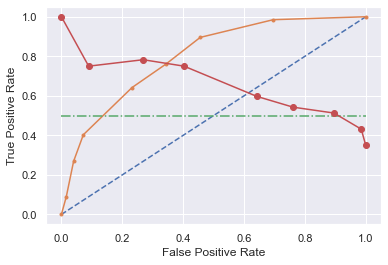

In [138]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)

# predict probabilities
probs = model_knc.predict_proba(X_test_median)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_median, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_median, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


# predict class values
yhat = model_knc.predict(X_test_median)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_median, probs)
# calculate F1 score
f1 = f1_score(y_test_median, yhat)
# calculate average precision score
ap = average_precision_score(y_test_median, probs)
#print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='-.')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='o')

AUC: 1.000
True Positive Rate - [0.         0.01492537 1.         1.        ], False Positive Rate - [0. 0. 0. 1.] Thresholds - [1.99472967 0.99472967 0.848405   0.00557113]
f1=1.000 ap=1.000


/Users/niru/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


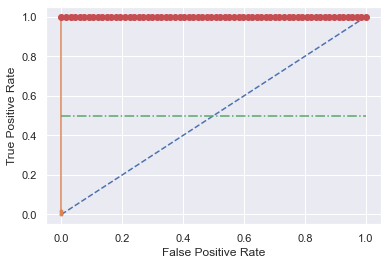

In [139]:
model_lin = LogisticRegression()
model_lin.fit(X_train_median,y_train_median) 

#Preparing ROC Curve (Receiver Operating Characteristics Curve)

# predict probabilities
probs = model_lin.predict_proba(X_test_median)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_median, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_median, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


# predict class values
yhat = model_lin.predict(X_test_median)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_median, probs)
# calculate F1 score
f1 = f1_score(y_test_median, yhat)
# calculate average precision score
ap = average_precision_score(y_test_median, probs)
print('f1=%.3f ap=%.3f' % (f1, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='-.')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='o')

AUC: 1.000
True Positive Rate - [0. 1. 1.], False Positive Rate - [0. 0. 1.] Thresholds - [2. 1. 0.]
f1=1.000 ap=1.000


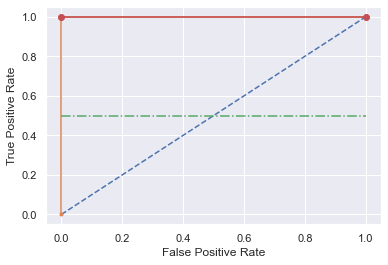

In [140]:
model_dec = DecisionTreeClassifier(max_depth=5)
model_dec.fit(X_train_median,y_train_median)

#Preparing ROC Curve (Receiver Operating Characteristics Curve)

# predict probabilities
probs = model_dec.predict_proba(X_test_median)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_median, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_median, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


# predict class values
yhat = model_dec.predict(X_test_median)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_median, probs)
# calculate F1 score
f1 = f1_score(y_test_median, yhat)
# calculate average precision score
ap = average_precision_score(y_test_median, probs)
print('f1=%.3f ap=%.3f' % (f1, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='-.')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='o')

AUC: 1.000
True Positive Rate - [0.         0.76119403 0.98507463 1.         1.         1.        ], False Positive Rate - [0.   0.   0.   0.   0.04 1.  ] Thresholds - [2.         1.         0.90909091 0.81818182 0.09090909 0.        ]
f1=1.000 ap=1.000


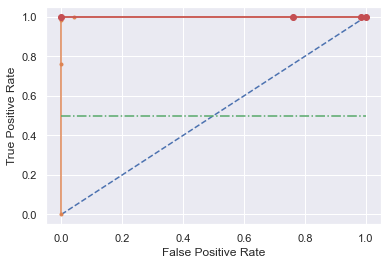

In [141]:
model_ranfc = RandomForestClassifier(n_estimators=11)
model_ranfc.fit(X_train_median,y_train_median)

#Preparing ROC Curve (Receiver Operating Characteristics Curve)

# predict probabilities
probs = model_ranfc.predict_proba(X_test_median)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_median, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_median, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


# predict class values
yhat = model_ranfc.predict(X_test_median)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_median, probs)
# calculate F1 score
f1 = f1_score(y_test_median, yhat)
# calculate average precision score
ap = average_precision_score(y_test_median, probs)
print('f1=%.3f ap=%.3f' % (f1, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='-.')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='o')